In [2]:
#This eda has a lot of visulaisation and feature engineering
#also it is a great example of preparatrion of target variable case_status


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('us_perm_visas.csv')

In [4]:
df.shape

(39051, 154)

In [5]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.00,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.00,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.00,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.00,NaN,yr,NaN,NaN,NaN


In [6]:
df.sample(1)

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
33533,Computer Systems Analysts,NaN,NaN,NaN,ONLINE,A-12230-92060,NaN,NaN,Certified-Expired,H-1B,...,NaN,NaN,NaN,IT,NaN,NaN,NaN,92000.0,151000.0,NaN


In [7]:
df.tail(5)

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
39046,Computer Systems Analysts,NaN,NaN,NaN,ONLINE,A-12271-02766,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Finance,NaN,NaN,NaN,115000.0,NaN,NaN
39047,"Software Developers, Applications",NaN,NaN,NaN,ONLINE,A-12271-02767,NaN,NaN,Certified-Expired,H-1B,...,NaN,NaN,NaN,IT,NaN,NaN,NaN,83762.0,NaN,NaN
39048,Computer Systems Analysts,NaN,NaN,NaN,ONLINE,A-12271-02768,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Other Economic Sector,NaN,NaN,NaN,78200.0,78200.0,NaN
39049,"Internists, General",NaN,NaN,NaN,ONLINE,A-12271-02769,NaN,NaN,Certified-Expired,H-1B,...,NaN,NaN,NaN,Educational Services,NaN,NaN,NaN,145588.0,171500.0,NaN
39050,"Software Developers, Systems Software",NaN,NaN,NaN,ONLINE,A-12271-02772,NaN,NaN,Certified-Expired,H-1B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

In [9]:
df['case_no']

,case_no
0,A-07323-97014
1,A-07332-99439
2,A-07333-99643
3,A-07339-01930
4,A-07345-03565
...,...
39046,A-12271-02766
39047,A-12271-02767
39048,A-12271-02768
39049,A-12271-02769


In [10]:
df['case_number']

,case_number
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
39046,NaN
39047,NaN
39048,NaN
39049,NaN


In [11]:
#seeing the values of case_no and case_number it seems both have same meaning, i.e-visa application no
#few values at the top in case_no is null
#few values at the tail case_number is null

In [12]:
df['case_no'].nunique()

39050

In [13]:
df['case_number'].nunique()

0

In [14]:
df.shape

(39051, 154)

In [15]:
df['case_number'].isna().sum()

39051

In [16]:
#null value in case number is almost close to values in case no

In [17]:
134990 + 238418

373408

In [18]:
df['case_number'] #Top 135269 rows are null values

,case_number
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
39046,NaN
39047,NaN
39048,NaN
39049,NaN


In [19]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [20]:
df.columns.get_loc('case_no') #to get column index of case_no

5

In [21]:
df.columns.get_loc('case_number') #to get column index of case_number

6

In [22]:
casenoindex = df.columns.get_loc('case_no')
casenumberindex = df.columns.get_loc('case_number')

casenumberlist = []
for value in df.iloc[0:135269, casenoindex]:
    casenumberlist.append(value)

for value in df.iloc[135269:374362, casenumberindex]:
    casenumberlist.append(value)


In [23]:
df['casenumber'] = casenumberlist

In [24]:
df.drop(['case_no', 'case_number'], axis=1, inplace=True)

In [25]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_received_date', 'case_status',
       'class_of_admission', 'country_of_citizenship', 'country_of_citzenship',
       ...
       'ri_us_workers_considered', 'schd_a_sheepherder', 'us_economic_sector',
       'wage_offer_from_9089', 'wage_offer_to_9089',
       'wage_offer_unit_of_pay_9089', 'wage_offered_from_9089',
       'wage_offered_to_9089', 'wage_offered_unit_of_pay_9089', 'casenumber'],
      dtype='object', length=153)

In [26]:
df.case_status.unique()

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [27]:
#you can also use directly value_counts
for value in df.case_status.unique():
    print(len(df[df['case_status'] == value]), "occurence of stats '{}'".format(value))

14726 occurence of stats 'Certified'
2891 occurence of stats 'Denied'
20077 occurence of stats 'Certified-Expired'
1357 occurence of stats 'Withdrawn'


In [28]:
df = df[df.case_status != 'Withdrawn']

In [29]:
df.case_status.value_counts()

,count
case_status,
Certified-Expired,20077
Certified,14726
Denied,2891


In [30]:
df.loc[df.case_status == "Certified-Expired", "case_status"] = "Certified"

In [31]:
df.case_status.value_counts()

,count
case_status,
Certified,34803
Denied,2891


In [32]:
df.case_status.value_counts(normalize = True)*100

,proportion
case_status,
Certified,92.330344
Denied,7.669656


In [33]:
#insights: 7.2% of the visa application were denied

In [34]:
df.isnull().sum()

,0
add_these_pw_job_title_9089,19457
agent_city,37694
agent_firm_name,37694
agent_state,37694
application_type,0
...,...
wage_offer_unit_of_pay_9089,18477
wage_offered_from_9089,19220
wage_offered_to_9089,32623
wage_offered_unit_of_pay_9089,37694


In [35]:
#dropping all empty rows and columns
df.dropna(axis = 1, how='all', inplace = True)
df.dropna(axis = 0, how='all', inplace = True)

In [36]:
for columns in df.columns:
    print(f"The missing values for {columns} is {df[columns].isnull().sum()}")

The missing values for add_these_pw_job_title_9089 is 19457
The missing values for application_type is 0
The missing values for case_status is 0
The missing values for class_of_admission is 2043
The missing values for country_of_citizenship is 19219
The missing values for country_of_citzenship is 18477
The missing values for decision_date is 0
The missing values for employer_address_1 is 2
The missing values for employer_address_2 is 25152
The missing values for employer_city is 2
The missing values for employer_name is 2
The missing values for employer_postal_code is 7
The missing values for employer_state is 2
The missing values for job_info_work_city is 12
The missing values for job_info_work_state is 11
The missing values for naics_2007_us_code is 18535
The missing values for naics_2007_us_title is 19124
The missing values for naics_us_code_2007 is 19245
The missing values for naics_us_title_2007 is 20113
The missing values for pw_amount_9089 is 298
The missing values for pw_job_ti

In [37]:
df.columns

Index(['add_these_pw_job_title_9089', 'application_type', 'case_status',
       'class_of_admission', 'country_of_citizenship', 'country_of_citzenship',
       'decision_date', 'employer_address_1', 'employer_address_2',
       'employer_city', 'employer_name', 'employer_postal_code',
       'employer_state', 'job_info_work_city', 'job_info_work_state',
       'naics_2007_us_code', 'naics_2007_us_title', 'naics_us_code_2007',
       'naics_us_title_2007', 'pw_amount_9089', 'pw_job_title_9089',
       'pw_level_9089', 'pw_soc_code', 'pw_soc_title', 'pw_source_name_9089',
       'pw_unit_of_pay_9089', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089', 'casenumber'],
      dtype='object')

In [38]:
#internal homework:
#deal with missing value treatement

In [39]:
df['decision_date']

,decision_date
0,2012-02-01
1,2011-12-21
2,2011-12-01
3,2011-12-01
4,2012-01-26
...,...
39046,2013-05-23
39047,2012-12-26
39048,2013-09-27
39049,2013-01-31


In [40]:
df['decision_date'] = pd.to_datetime(df['decision_date'])

In [41]:
df['decision_date']

,decision_date
0,2012-02-01
1,2011-12-21
2,2011-12-01
3,2011-12-01
4,2012-01-26
...,...
39046,2013-05-23
39047,2012-12-26
39048,2013-09-27
39049,2013-01-31


In [42]:
df['year'] = df['decision_date'].dt.year
df['month'] = df['decision_date'].dt.month
df['day'] = df['decision_date'].dt.day

<Axes: xlabel='year', ylabel='count'>

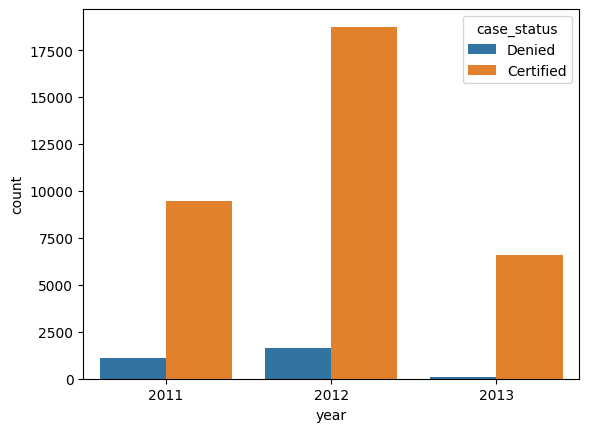

In [43]:
#year wise status

sns.countplot(x = 'year', hue = 'case_status', data=df)

In [44]:
#insights:
#upward trend
#2016-highest

In [45]:
df.employer_city.unique()

array(['NEW YORK', 'CARLSTADT', 'GLEN ALLEN', ..., 'HOLIDAYSBERG',
       'OLEAN', 'MCKENZIE'], dtype=object)

In [46]:
df.employer_city.value_counts()

,count
employer_city,
NEW YORK,2088
SANTA CLARA,975
HOUSTON,943
REDMOND,825
SAN JOSE,741
...,...
WAUCONDA,1
MIAMI SHORES,1
TALLLAHASSEE,1


In [47]:
df['employer_city'] = df['employer_city'].str.upper()
df['employer_city'].unique()

array(['NEW YORK', 'CARLSTADT', 'GLEN ALLEN', ..., 'HOLIDAYSBERG',
       'OLEAN', 'MCKENZIE'], dtype=object)

<Axes: xlabel='employer_city', ylabel='count'>

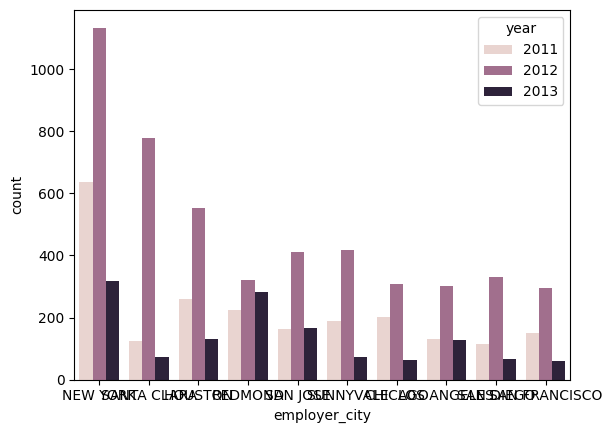

In [48]:
#employer city year wise: year wise which are the city where the visa approvoved people are worrking

sns.countplot(x = 'employer_city', hue = 'year', data=df, order = df.employer_city.value_counts().iloc[:10].index)

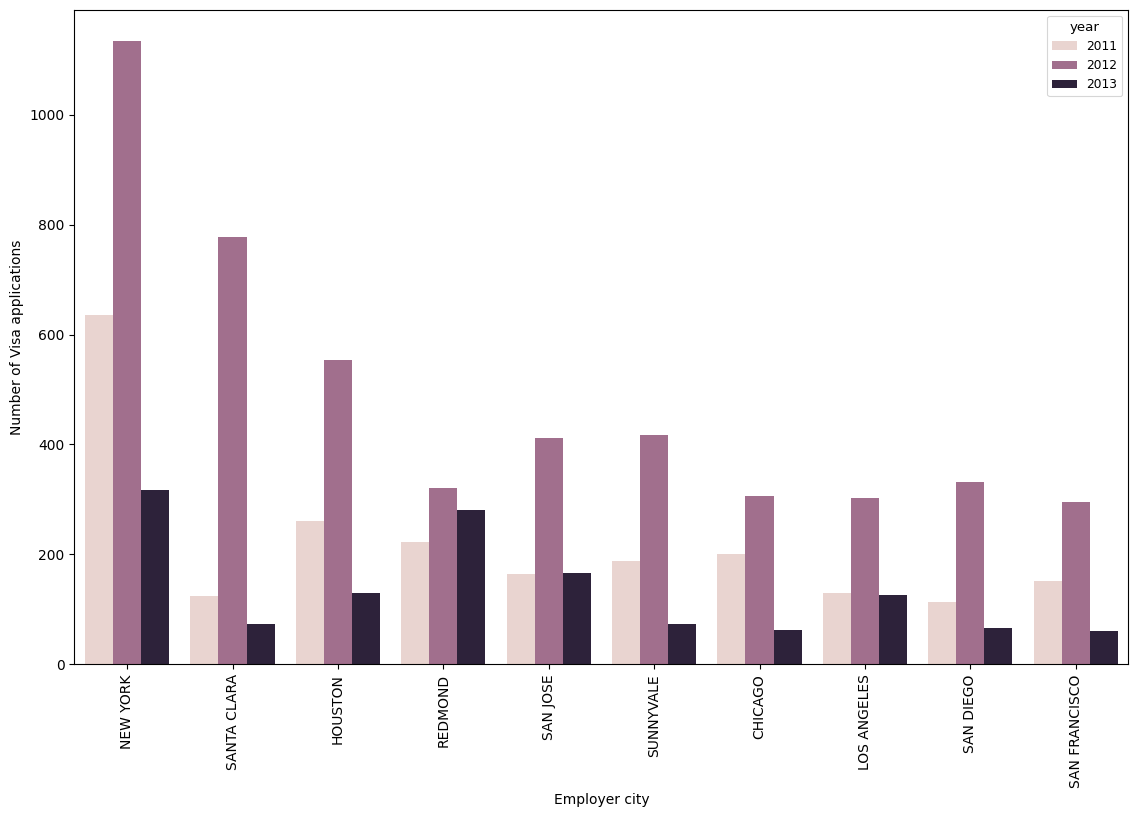

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(13.6, 8.5)

sns.set_context("paper",  rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x = 'employer_city', hue = 'year', data=df, order = df.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
ax.set(xlabel='Employer city', ylabel='Number of Visa applications')
plt.show()

In [50]:
#insights

In [51]:
#top 10 employers by visa application

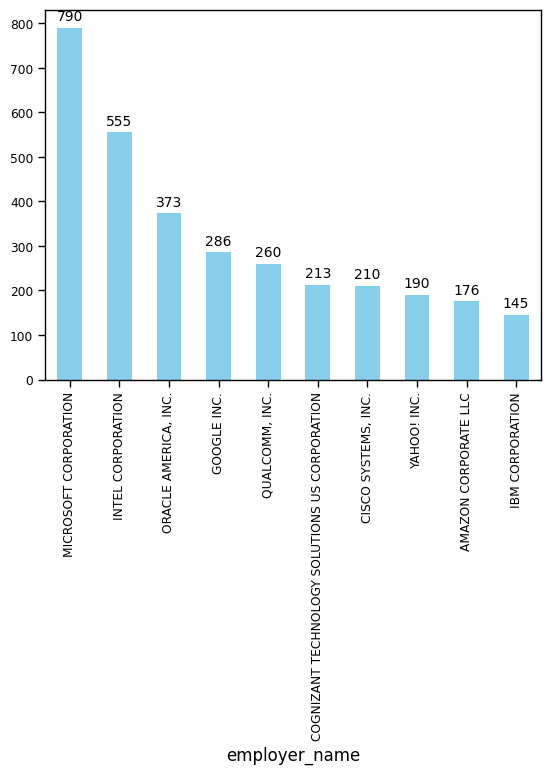

In [52]:
top_emp = df['employer_name'].value_counts().head(10)
top_emp.plot(kind = 'bar', color = 'skyblue')
for i, v in enumerate(top_emp):
    plt.text(i, v+10, str(v), ha = 'center', va='bottom', fontsize = 10)

In [53]:
#insights

In [54]:
df['us_economic_sector']

,us_economic_sector
0,IT
1,Other Economic Sector
2,Aerospace
3,Other Economic Sector
4,Advanced Mfg
...,...
39046,Finance
39047,IT
39048,Other Economic Sector
39049,Educational Services


In [55]:
#value_counts function from scratch
us_economic_counts = {}
for value in df['us_economic_sector'].dropna():
    if value in us_economic_counts:
        us_economic_counts[value] += 1
    else:
         us_economic_counts[value] = 1

In [56]:
us_economic_counts

{'IT': 14006,
 'Other Economic Sector': 4800,
 'Aerospace': 1120,
 'Advanced Mfg': 5330,
 'Educational Services': 2577,
 'Retail': 1080,
 'Construction': 506,
 'Hospitality': 763,
 'Automotive': 327,
 'Health Care': 2005,
 'Agribusiness': 202,
 'Finance': 2618,
 'Energy': 333,
 'Transportation': 295,
 'Homeland Security': 15,
 'Biotechnology': 123,
 'Geospatial': 50}

In [57]:
#nos as key and names of sector as list
usecollabels = []
usecolvalues = []

for key, value in us_economic_counts.items():
    usecollabels.append(key)
    usecolvalues.append(value)

In [58]:
usecollabels

['IT',
 'Other Economic Sector',
 'Aerospace',
 'Advanced Mfg',
 'Educational Services',
 'Retail',
 'Construction',
 'Hospitality',
 'Automotive',
 'Health Care',
 'Agribusiness',
 'Finance',
 'Energy',
 'Transportation',
 'Homeland Security',
 'Biotechnology',
 'Geospatial']

In [59]:
usecolvalues

[14006,
 4800,
 1120,
 5330,
 2577,
 1080,
 506,
 763,
 327,
 2005,
 202,
 2618,
 333,
 295,
 15,
 123,
 50]

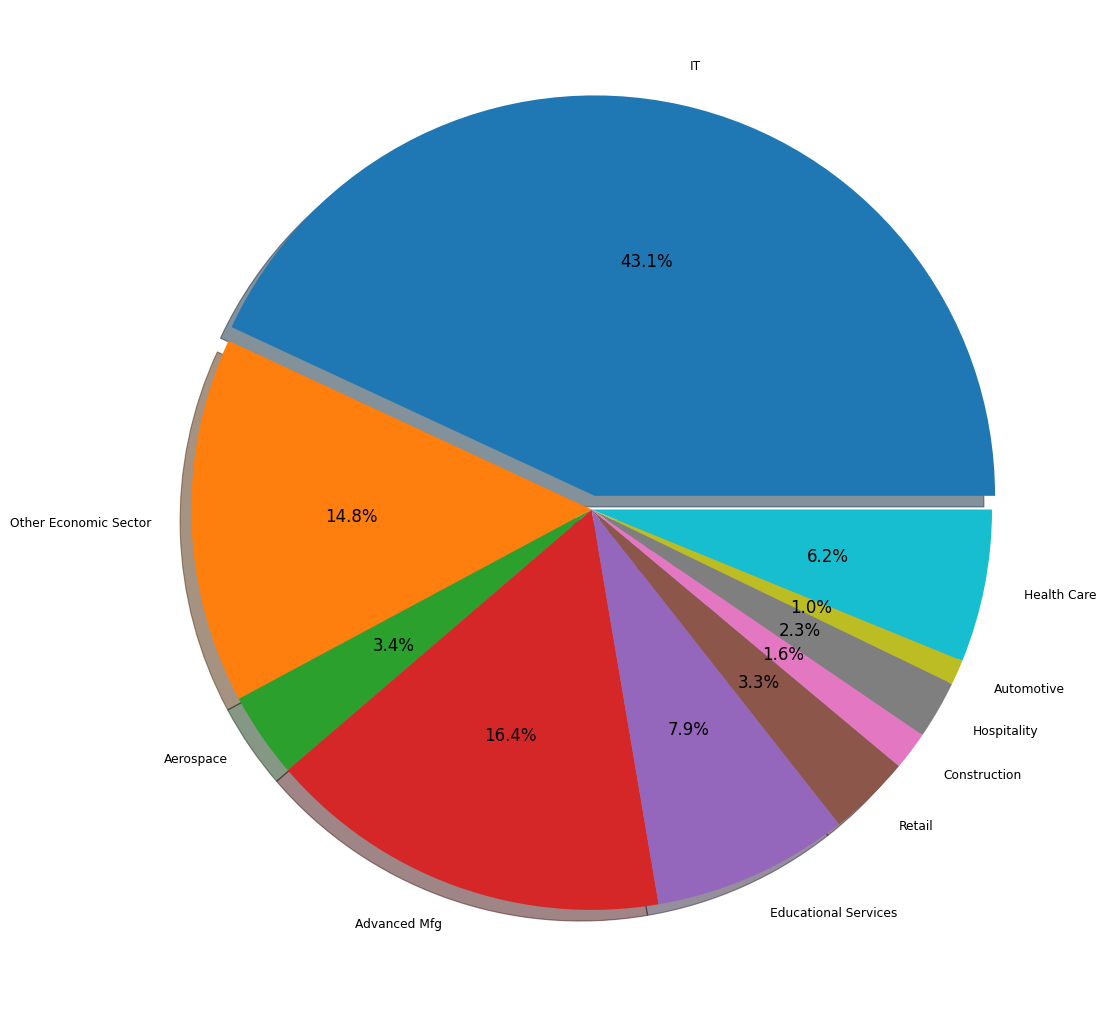

In [60]:
plt.figure(figsize = (13, 13))
explode = (0.035, 0, 0, 0,0,0,0,0,0,0)
plt.pie(usecolvalues[:10], labels = usecollabels[:10], explode = explode, shadow=True, autopct = "%1.1f%%")
plt.show()

In [61]:
#insights >> IT

In [62]:
df.columns

Index(['add_these_pw_job_title_9089', 'application_type', 'case_status',
       'class_of_admission', 'country_of_citizenship', 'country_of_citzenship',
       'decision_date', 'employer_address_1', 'employer_address_2',
       'employer_city', 'employer_name', 'employer_postal_code',
       'employer_state', 'job_info_work_city', 'job_info_work_state',
       'naics_2007_us_code', 'naics_2007_us_title', 'naics_us_code_2007',
       'naics_us_title_2007', 'pw_amount_9089', 'pw_job_title_9089',
       'pw_level_9089', 'pw_soc_code', 'pw_soc_title', 'pw_source_name_9089',
       'pw_unit_of_pay_9089', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089', 'casenumber', 'year',
       'month', 'day'],
      dtype='object')

In [63]:
df.job_info_job_title.value_counts()[:20]

AttributeError: 'DataFrame' object has no attribute 'job_info_job_title'

In [64]:
#Computer Systems Analyst - V , Computer Systems Analyst - IV and so on, have different job title
#but job profile/domain is same

# software engineer , SOFTWARE ENGINEER, Sr. Software Engineer >> all of this should come in same profile


In [65]:
#converting to lower case
df.job_info_job_title = df.job_info_job_title.str.lower()

#Splitting job titles by '-'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


df['job_info_job_title'].value_counts(dropna=True)[:10]

AttributeError: 'DataFrame' object has no attribute 'job_info_job_title'

In [66]:
#get the top 10 job titles by count
top_job_titles = df.job_info_job_title.value_counts().head(10)
#create a bar plot
plt.figure(figsize = (12.7, 8.3))
plt.bar(top_job_titles.index, top_job_titles,  color=sns.color_palette("viridis", len(top_job_titles)))

#add count labels above the bar
for i, v in enumerate(top_job_titles):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10, rotation=90)

plt.xlabel("Job title")
plt.ylabel("Number of visa application")
plt.title("Top 10 job titles by visa application")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'job_info_job_title'

In [67]:
#insights>> software engineer applies most visa application

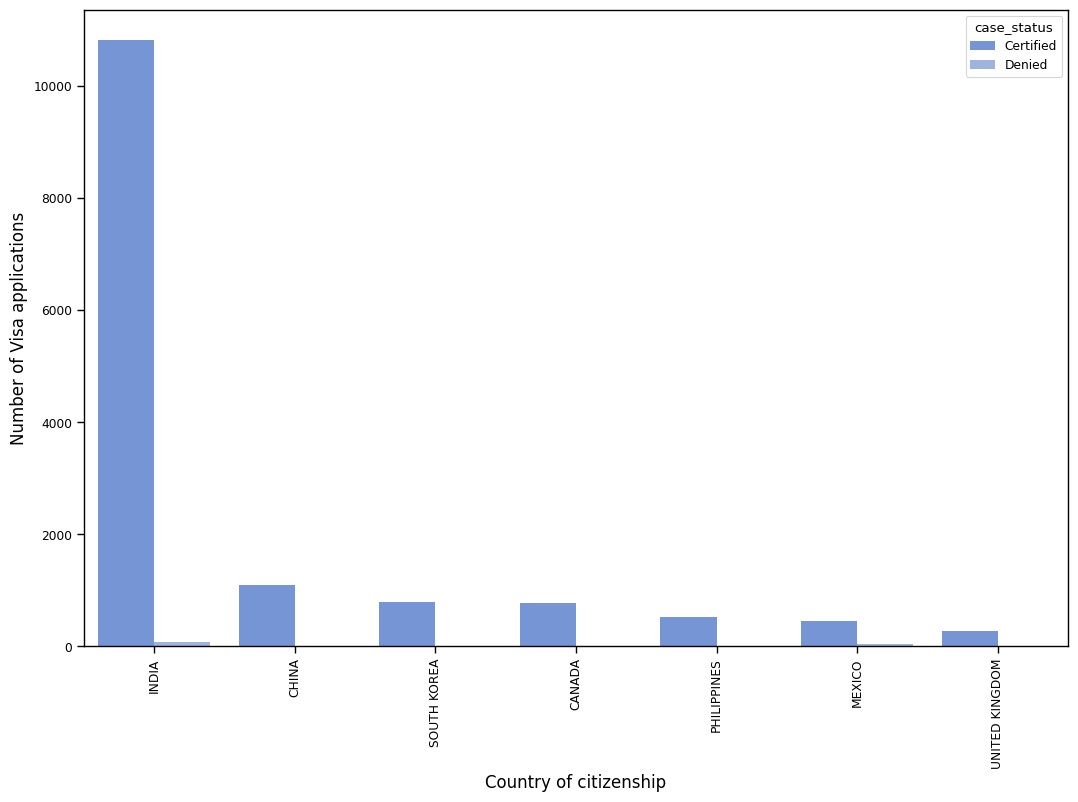

In [68]:
#convert country_of_citizenship column to categroical data type
df.country_of_citizenship = pd.Categorical(df.country_of_citizenship)

fig, ax = plt.subplots(figsize=(12.7, 8.27))
sns.set_context(rc={"font.size":14, "axes.labelsize":12})

# Creating the count plot
sns.countplot(x='country_of_citizenship', hue='case_status', data=df,
              palette=sns.diverging_palette(255, 133, l=60, n=7, center="light"),
              order=df.country_of_citizenship.value_counts().iloc[:7].index)

plt.xticks(rotation=90)

# Setting label titles
ax.set(xlabel='Country of citizenship', ylabel='Number of Visa applications')

plt.show()  # This line is necessary to display the plot


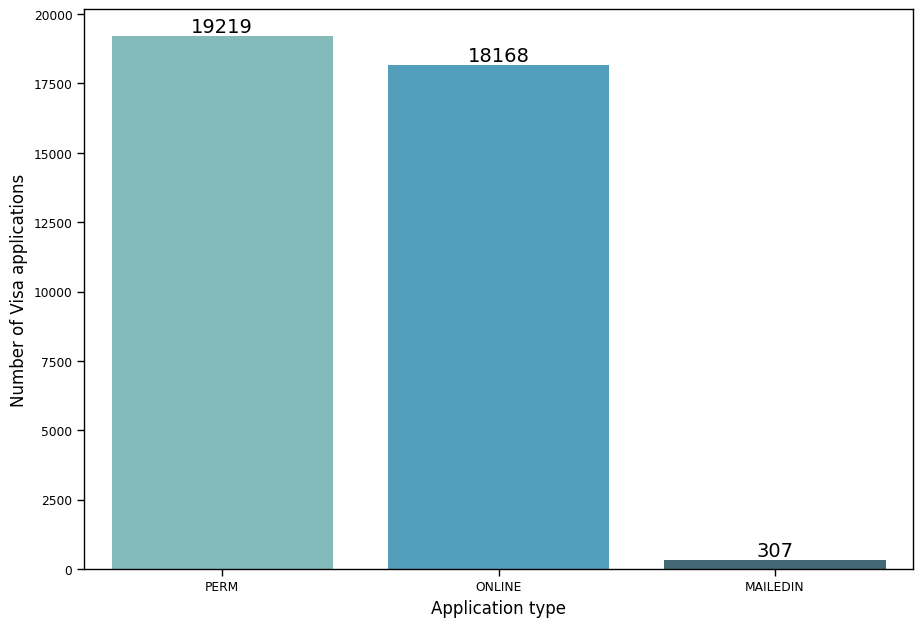

In [69]:
# Setting plot parameters
plt.figure(figsize=(10.7, 7.27))

# Creating the count plot
sns.countplot(x='application_type', data=df, palette='GnBu_d', order=df['application_type'].value_counts().index[:10])

# Iterating over elements in "application_type" column and displaying counts above bars
for i, v in enumerate(df['application_type'].value_counts().head(10)):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Setting labels
plt.xlabel('Application type')
plt.ylabel('Number of Visa applications')
plt.show()

KeyError: 'foreign_worker_info_education'

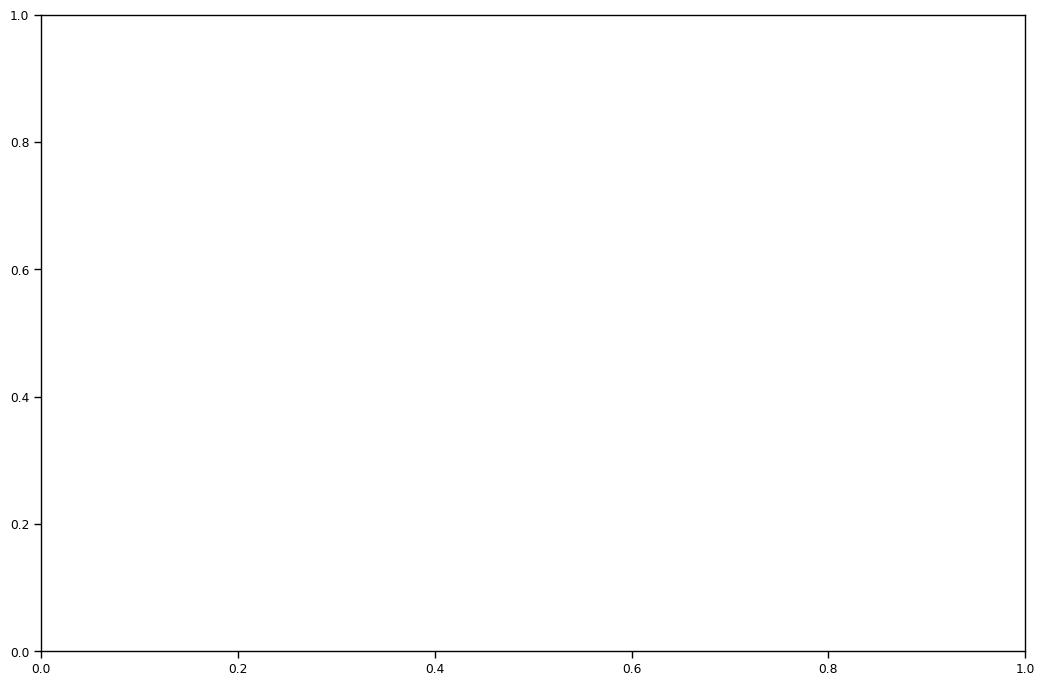

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)

# Creating the count plot
sns.countplot(x='foreign_worker_info_education', data=df,
              palette=sns.color_palette("Paired"),
              order=df['foreign_worker_info_education'].value_counts().index[:10])

# Iterating over elements in "foreign_worker_info_education" column and displaying counts above bars
for i, v in enumerate(df['foreign_worker_info_education'].value_counts().head(10)):
    ax.text(i, v, str(v), horizontalalignment='center', verticalalignment='bottom')

# Setting label titles
ax.set(xlabel='Education level', ylabel='Number of Visa applications')
plt.show()


In [71]:
#percentage of non null values

i = 0;
for col in df.columns:
    i = i+1;
    print (i-1,"Column: '{}'".format(col),"contains ", np.round(100*df[col].count()/len(df['case_status']),decimals=2),"% non-null values" )

0 Column: 'add_these_pw_job_title_9089' contains  48.38 % non-null values
1 Column: 'application_type' contains  100.0 % non-null values
2 Column: 'case_status' contains  100.0 % non-null values
3 Column: 'class_of_admission' contains  94.58 % non-null values
4 Column: 'country_of_citizenship' contains  49.01 % non-null values
5 Column: 'country_of_citzenship' contains  50.98 % non-null values
6 Column: 'decision_date' contains  100.0 % non-null values
7 Column: 'employer_address_1' contains  99.99 % non-null values
8 Column: 'employer_address_2' contains  33.27 % non-null values
9 Column: 'employer_city' contains  99.99 % non-null values
10 Column: 'employer_name' contains  99.99 % non-null values
11 Column: 'employer_postal_code' contains  99.98 % non-null values
12 Column: 'employer_state' contains  99.99 % non-null values
13 Column: 'job_info_work_city' contains  99.97 % non-null values
14 Column: 'job_info_work_state' contains  99.97 % non-null values
15 Column: 'naics_2007_us_cod

In [72]:
#keep the columns with non null values count > 33000

df = df.loc[:, df.count()>= 330000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37694 entries, 0 to 39050
Empty DataFrame


In [73]:
df.case_status

AttributeError: 'DataFrame' object has no attribute 'case_status'

In [74]:
df.loc[df['case_status'] == 'Certified', 'case_status'] =1
df.loc[df['case_status'] == 'Denied', 'case_status'] =0

KeyError: 'case_status'

In [75]:
df['case_status'] .unique()

KeyError: 'case_status'

In [76]:
df['employer_state'].isnull().sum()

KeyError: 'employer_state'

In [77]:
df['employer_state'].mode()[0]

KeyError: 'employer_state'

In [78]:
df['employer_state'] = df['employer_state'].fillna(df['employer_state'].mode()[0])

KeyError: 'employer_state'

In [79]:
df['employer_state'].isnull().sum()

KeyError: 'employer_state'

In [80]:
df['employer_state']

KeyError: 'employer_state'

In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Dictionary for mapping state names to abbreviations
state_abbrevs = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP',
    'Palau': 'PW',
    'Puerto Rico': 'PR',
    'Virgin Islands': 'VI',
    'District of Columbia': 'DC'
}

# Reverse dictionary for abbreviation to state name mapping
abbrev_to_state = {v: k.upper() for k, v in state_abbrevs.items()}

# Clean and transform employer_state column in DataFrame
df['employer_state'] = df['employer_state'].fillna('').astype(str).str.strip().str.upper()

# Replace abbreviations with full state names
df['employer_state'] = df['employer_state'].replace(abbrev_to_state)


KeyError: 'employer_state'

In [82]:
df['employer_state']

KeyError: 'employer_state'

In [83]:
df.pw_soc_code

AttributeError: 'DataFrame' object has no attribute 'pw_soc_code'

In [84]:
df['pw_soc_code'] = df['pw_soc_code'].str.replace('.','')
df['pw_soc_code'] = df['pw_soc_code'].str.replace('-','')
df['pw_soc_code'] = df['pw_soc_code'].astype(str).str[0:6]
df['pw_soc_code'].value_counts()

#Finding "nan" values in "pw_soc_code" column and filling them with mode
df.loc[df['pw_soc_code'] == "nan",'pw_soc_code'] = df['pw_soc_code'].mode()[0]

#Finding "None" values in "pw_soc_code" column and filling them with mode
df.loc[df['pw_soc_code'] == "None",'pw_soc_code'] = df['pw_soc_code'].mode()[0]

#Changing type from string to int
df['pw_soc_code'] = df['pw_soc_code'].astype(int)
df['case_status'] = df['case_status'].astype(int)

KeyError: 'pw_soc_code'

In [85]:
df['case_status']

KeyError: 'case_status'

In [86]:
#missing value treatment for other columns

#Replacing missing values with mode
df['class_of_admission']=df['class_of_admission'].fillna((df['class_of_admission'].mode()[0]))
df['country_of_citizenship']=df['country_of_citizenship'].fillna((df['country_of_citizenship'].mode()[0]))
df['employer_city']=df['employer_city'].fillna((df['employer_city'].mode()[0]))
df['employer_name']=df['employer_name'].fillna((df['employer_name'].mode()[0]))
df['employer_name']=df['employer_name'].astype(str).str.upper()
df['pw_source_name_9089']=df['pw_source_name_9089'].fillna((df['pw_source_name_9089'].mode()[0]))

KeyError: 'class_of_admission'

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37694 entries, 0 to 39050
Empty DataFrame


In [88]:
# Convert the column containing numerical values with commas to numeric format
df['pw_amount_9089'] = df['pw_amount_9089'].str.replace(',', '').astype(float)

# Now, you can replace null values in the numerical column with the median
median_pw_amount = df['pw_amount_9089'].median()
df['pw_amount_9089'].fillna(median_pw_amount, inplace=True)

# Verify that there are no more null values
print(df.isnull().sum())

KeyError: 'pw_amount_9089'

In [89]:
#Indices of selected features for categorcal data to do encoding
chosen_attrs = [0,1,2,5,6,8,12,14,17]
df = df.iloc[:,chosen_attrs]

IndexError: positional indexers are out-of-bounds

In [90]:
from sklearn.preprocessing import LabelEncoder
categorical_variables = {}

#Creating categories denoted by integers from column values
for col in df.columns:
    cat_var_name = "cat_"+ col
    cat_var_name = LabelEncoder()
    cat_var_name.fit(df[col])
    df[col] = cat_var_name.transform(df[col])
    categorical_variables[col] = cat_var_name

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37694 entries, 0 to 39050
Empty DataFrame


In [91]:
df

""
0
1
2
3
4
...
39046
39047
39048
39049
